<a href="https://colab.research.google.com/github/Morax19/ML_UCV/blob/Proyecto1_ML/Notebook/ML_Proyecto1_DanielHernandez_JuanPRivas_JoinerRojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Central de Venezuela

Facultad de Ciencias

Escuela de Computación

Aprendizaje Automático
<br>
<br>
<br>
<br>

#**PROYECTO #1: APRENDIZAJE SUPERVISADO**
<br>
<br>
<br>
<br>
Autores:
<br>Juan Pablo Rivas - CI: 28304720
<br>Joiner Rojas - CI: 29501730
<br>Daniel Hernández - CI: 27795163
<br>
<br>
Fecha: 11 de marzo de 2025</center>

## Parte 1: Planteamiento del problema

El mundo en el que vivimos parece acelerarse con cada día que pasa. Los seres humanos estamos constantemente expuestos a situaciones que generan estímulos positivos y negativos, los cuales tienden a afectar, en mayor o menor medida, nuestro estilo de vida. Desde nuestras actividades cotidianas, como estudiar o trabajar, hasta aquellas más esporádicas, como ver un partido de nuestro equipo favorito, todas influyen en nuestra salud y bienestar. Incluso tareas que requieren solo unos minutos, como revisar las redes sociales, tienen un impacto. Esto se debe, en gran medida, al avance tecnológico de los últimos años, que dificulta la desconexión y genera malestar, estrés, aumento de la presión arterial y otros problemas que afectan directamente nuestra salud.

Una de las peores secuelas que puede sufrir una persona a raíz de lo anterior es un derrame cerebral o accidente cerebrovascular (ACV). Esta afección grave ocurre cuando el flujo sanguíneo al cerebro se interrumpe. Se clasifica como isquémico cuando un coágulo bloquea un vaso sanguíneo, o hemorrágico cuando este se rompe. Cabe mencionar que no son mutuamente excluyentes; es decir, un ACV isquémico puede derivar en uno hemorrágico.

Los síntomas de un ACV aparecen de forma súbita y varían según la zona del cerebro afectada, pero algunos comunes incluyen entumecimiento repentino de un lado del cuerpo, dificultad para hablar o entender el habla, problemas de visión y dolor de cabeza intenso.

Esta situación se considera una emergencia, ya que requiere tratamiento inmediato para mitigar los posibles efectos posteriores. Estos varían según el tipo de ACV, pero pueden incluir la administración de medicamentos trombolíticos para disolver el coágulo, anticoagulantes e incluso cirugías para extraer coágulos o reparar los vasos sanguíneos dañados. Después de sufrir un ACV, las secuelas dependen de la cantidad de tejido cerebral dañado, las funciones corporales afectadas y la rapidez con que se administró el tratamiento. Sin embargo, algunas de las más comunes son:

* Dificultad para hablar, pensar y moverse.
* Desarrollo de depresión o ansiedad.
* Pérdida de memoria.
* Dolor o entumecimiento en algunas zonas del cuerpo.
* Convulsiones.

Además del estrés, existen otros factores de riesgo como la obesidad, el sedentarismo, el aumento del consumo de alimentos procesados y la falta de actividad física. Aunque podemos tomar medidas para disminuir estos factores, el envejecimiento es inevitable y uno de los principales causantes de este tipo de accidentes. Aunado a esto, una de las situaciones más alarmantes es el aumento de estos accidentes en personas relativamente jóvenes. Esto se debe al ritmo de vida cada vez más acelerado que mencionamos al inicio, el cual comienza a afectarnos a edades más tempranas.

Es por ello que, a lo largo de este notebook, buscaremos desarrollar un **Evaluador de Riesgo de Accidente Cerebrovascular**, una solución web que sirva como herramienta para que las personas tomen conciencia sobre su estilo de vida y qué factores del mismo pueden estar contribuyendo a que sufran un ACV, antes de que se vean en esta terrible situación. Nuestro objetivo será entrenar un modelo de aprendizaje automático capaz de predecir la probabilidad de que una persona sufra un ACV, tomando como entrada los diferentes factores de riesgo presentes en su día a día.

## Parte 2: Entendimiento y análisis de los datos

El conjunto de datos que usaremos para el desarrollo del modelo será el siguiente: **[Stroke Risk Prediction Dataset based on Literature](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2)**.

La información de este conjunto de datos proviene de investigaciones médicas y las probabilidades de que aparezcan ciertos síntomas, la importancia de los factores de riesgo y cómo estos se relacionan con diferentes grupos de personas, se han extraído directamente de las recomendaciones de médicos y de estudios que analizan cómo las enfermedades se distribuyen en la población.

### 2.1. Configuración del entorno

El primer paso que tomamos es definir una semilla para garantizar la reproducibilidad de los resultados. Para ello, se usó la suma de los números de cédula de identidad de cada integrante, dividida entre la cantidad de integrantes:

In [1]:
SEED = (27795163 + 28304720 + 29501730)//3
print(SEED)

28533871


Para hacer la descarga de los datos, es necesario instalar el módulo [OpenDatasets](https://pypi.org/project/opendatasets/).

In [2]:
!pip install opendatasets

Antes de iniciar el análisis exploratorio del conjunto de datos, es de vital importancia importar las librerías que necesitaremos para el desarrollo del proyecto. A continuación, se muestran los enlaces a la documentación de cada una de ellas:

* [Pytorch](https://pytorch.org/docs/stable/index.html)
* [NumPy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Matplotlib](https://matplotlib.org/)
* [SciKit-Learn](https://scikit-learn.org/stable/)

In [3]:
# Agregar librerías acá
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
import opendatasets as ods
import torch.optim as optim
import matplotlib.pyplot as plt

# Metricas y preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### 2.2. Análisis exploratorio de los datos

Como paso inicial del análisis exploratorio del conjunto de datos, descargaremos los mismos desde Kaggle. Luego, los almacenaremos en un DataFrame para facilitar las operaciones sobre ellos.

In [4]:
#Descarga del conjunto de datos
ods.download(
    "https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2"
    )

try:
    # Almacenamos los datos en un Data Frame
    rawData = pd.read_csv("/content/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv")
except:
    # Almacenamos los datos en un Data Frame
    rawData = pd.read_csv("stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv")

# Se muestran una vista previa de los datos
rawData

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danielhernndez
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2


100%|██████████| 240k/240k [00:00<00:00, 92.3MB/s]

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,Female,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0
34996,29,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0
34997,44,Female,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0
34998,28,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0


Para determinar si existen valores nulos en alguna instancia de las variables presentes en el conjunto de datos, necesitamos una vista más detallada de los datos. Para ello, se presenta el siguiente fragmento de código:

In [5]:
# Información detallada del dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

Podemos observar que tenemos 19 variables para 35,000 pacientes, sin valores nulos en ninguna instancia. Como siguiente paso, analizaremos la cantidad de pacientes hombres y mujeres para validar que no haya sesgos de género. Además, revisaremos la cantidad de pacientes que se encuentran en riesgo y los que no, para determinar si las clases que definiremos están balanceadas.

In [6]:
print(f"Cantidad de pacientes hombres: {rawData[rawData['gender'] == 'Male'].shape[0]}")
print(f"Cantidad de pacientes mujeres: {rawData[rawData['gender'] == 'Female'].shape[0]}")
print(f"Cantidad de pacientes en riesgo de sufrir ACV: {rawData[rawData['at_risk'] == 1].shape[0]}")
print(f"Cantidad de pacientes que no están en riesgo de sufrir un ACV: {rawData[rawData['at_risk'] == 0].shape[0]}")

Cantidad de pacientes hombres: 17472
Cantidad de pacientes mujeres: 17528
Cantidad de pacientes en riesgo de sufrir ACV: 12887
Cantidad de pacientes que no están en riesgo de sufrir un ACV: 22113


Podemos ver que tenemos una cantidad similar de pacientes masculinos y femeninos, por lo que podemos descartar la existencia de sesgos de género en el conjunto de datos. Sin embargo, es importante notar que existe un desbalance en cuanto a pacientes que son propensos a sufrir un ACV o no. Este detalle debe tenerse en cuenta si se desea clasificar a los pacientes.

Por último, observaremos los valores extremos presentes en los datos, por ejemplo, aquellos pacientes con la mayor probabilidad de estar en riesgo y aquellos con la menor probabilidad

In [7]:
# Aquellos pacientes que tienen un 100% de probabilidad de estar en riesgo.
maxRisk = rawData[rawData['stroke_risk_percentage'] == rawData['stroke_risk_percentage'].max()]

#Aquellos pacientes cuya probabilidad de sufrir un ACV es de 0.
minRisk = rawData[rawData['stroke_risk_percentage'] == rawData['stroke_risk_percentage'].min()]

# Cantidades obtenidas
print(f"Cantidad de pacientes de alto riesgo: {maxRisk.shape[0]}")
print(f"Cantidad de pacientes de riesgo nulo: {minRisk.shape[0]}")

Cantidad de pacientes de alto riesgo: 3725
Cantidad de pacientes de riesgo nulo: 6


In [9]:
# Vista detallada de personas con la máxima probabilidad de sufrir un ACV
maxRisk

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
17,64,Female,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,100.0,1
23,68,Female,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,100.0,1
57,51,Female,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34953,65,Female,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,100.0,1
34954,51,Male,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,100.0,1
34961,68,Male,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,100.0,1
34987,50,Male,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,100.0,1


In [10]:
# Vista detallada de personas con mínima probabilidad de sufrir un ACV
minRisk

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
11512,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
23735,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
26401,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
28756,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
30919,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
32904,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0


### 2.3. Pre-procesamiento

Para comenzar esta sección, lo primero que haremos será modificar la variable 'gender' para trabajar exclusivamente con valores numéricos en lugar de variables categóricas, para ello haremos uso de [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

Además, normalizaremos los valores de la columna 'stroke_risk_percentage' para que estén entre 0 y 1.

In [11]:
# Definimos nuestra instancia para el OneHotEncoder
encoder = OneHotEncoder()

# Se modifican las columnas y se almacenan en un nuevo Data Frame
encodedData = encoder.fit_transform(rawData[['gender']])
encodedData = pd.DataFrame(encodedData.toarray(), columns=encoder.get_feature_names_out(['gender']))

# Concatenamos los Data Frames en uno nuevo para que se reflejen los cambios
finalData = pd.concat([encodedData, rawData.drop(['gender'],axis = 1)],axis = 1)

# Normalizamos los valores de los porcentajes
finalData['stroke_risk_percentage']/=100

# Vista previa de los datos pre-procesados
finalData.head()

,gender_Female,gender_Male,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,0.0,1.0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.333,0
1,0.0,1.0,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1.000,1
2,1.0,0.0,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000,1
3,0.0,1.0,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.445,0
4,0.0,1.0,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0.848,1


Realizada esta operación, podemos calcular la matriz de correlación entre las variables, lo que nos permitirá identificar las relaciones lineales entre ellas. Esto es útil para comprender qué variables están más fuertemente asociadas entre sí y cómo podrían influir en el riesgo de sufrir un ACV.

Como resultado se obtuvo la siguiente matriz, es importante saber que los valores cercanos a 1 o -1 indican una fuerte correlación lineal, y los valores cercanos a 0 indican una correlación débil o nula:

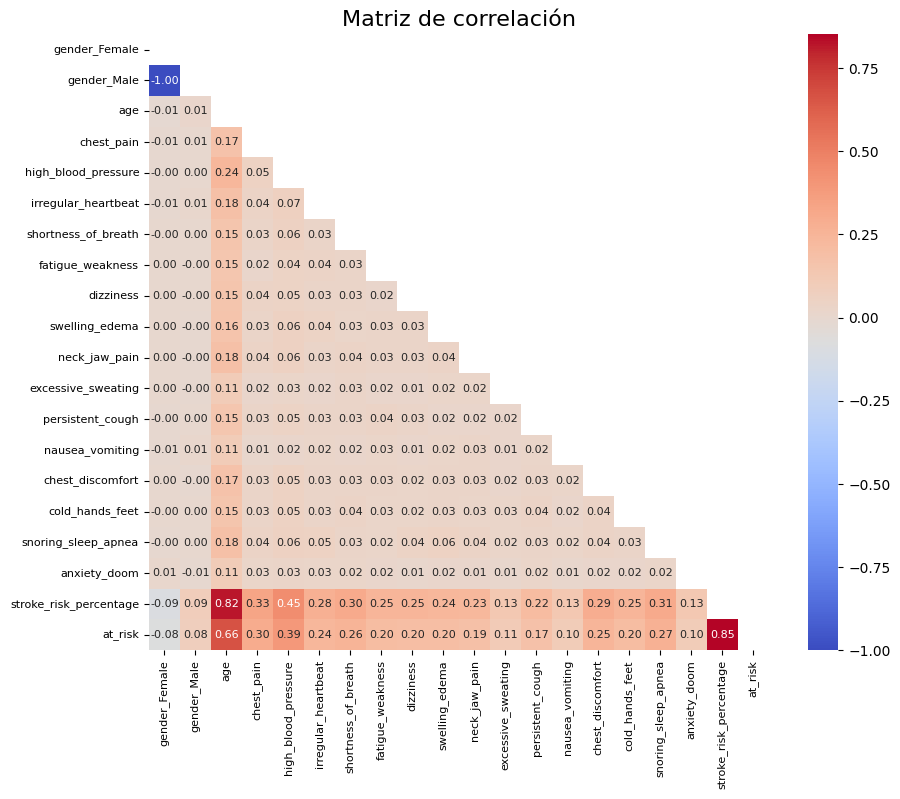

In [12]:
# Definimos una máscara para la matriz de correlación
mask = np.triu(np.ones_like(finalData.corr(), dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(finalData.corr(), annot=True, fmt=".2f", mask = mask, cmap="coolwarm", annot_kws={"fontsize": 8})
plt.title("Matriz de correlación", fontsize=16) # Título del gráfico
plt.tick_params(axis='both', labelsize=8) # Reduce el tamaño de las etiquetas del eje
plt.show()

Nuestro siguiente paso será separar los datos en conjuntos de entrenamiento y prueba para los modelos de regresión que deseamos entrenar. Es por ello,  que debemos separar los datos de las etiquetas correspondientes presentes en la columna 'stroke_risk_percentage', la cual va a ser utilizada como variable objetivo.

Por lo tanto, hacemos:

In [13]:
# Datos sin las etiquetas
X = finalData.copy().drop(['stroke_risk_percentage', 'at_risk'],axis = 1)

# Vista previa de los datos
X

,gender_Female,gender_Male,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom
0,0.0,1.0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,1.0,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2,1.0,0.0,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1.0,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,1.0,0.0,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
34996,1.0,0.0,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
34997,1.0,0.0,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1
34998,1.0,0.0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Una vez separados los datos, debemos almacenar las etiquetas correspondientes a cada instancia. Para ello, tenemos:

In [14]:
# Etiquetas para los modelos de regresion
yProba = finalData['stroke_risk_percentage']

# Vista previa de las etiquetas
yProba

,stroke_risk_percentage
0,0.333
1,1.000
2,1.000
3,0.445
4,0.848
...,...
34995,0.157
34996,0.193
34997,0.468
34998,0.139


Utilizando train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), dividimos los datos en los conjuntos de entrenamiento y prueba aleatorios para los modelos que vamos a entrenar. La proporción para el conjunto de datos de entrenamiento será del 80%, mientras que para el conjunto de datos de prueba usaremos el 20% restante.

In [15]:
# Separamos los datos en gruos de entrenamiento y prueba usando una relación de 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, yProba, test_size=0.2, random_state=SEED)

## Parte 3: Modelos de aprendizaje supervisado

Dado que nuestro objetivo es estimar un valor contínuo, nos encontramos ante un problema de regresión. Por ello, debemos utilizar modelos de regresión diseñados para este tipo de situaciones. Al mismo tiempo, debemos destacar que entrenaremos y compararemos el rendimiento de múltiples modelos. Esto se debe a que, al encontrarnos en un ámbito médico, debemos ser exhaustivos al proporcionar una solución con el mejor rendimiento posible, ya que diferentes modelos pueden tener fortalezas y debilidades según las características de los datos y esto influye directamente en la salud de las personas.

Para evaluar el rendimiento de los modelos de regresión planteados en esta sección, utilizaremos las siguientes métricas, ya que son ampliamente utilizadas y proporcionan información valiosa sobre la precisión y el ajuste del modelo:

* $R^2$: El coeficiente de determinación, evalúa qué tan bien se ajusta el modelo a los datos.

* $MSE$: El error cuadrático medio, que indica la magnitud promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.

* $RMSE$: La raíz cuadrada del error cuadrático medio, que indica la magnitud promedio de los errores en la misma unidad que la variable dependiente. Es una métrica muy usada ya que los errores se muestran en las mismas unidades que la variable que se está midiendo, lo cual facilita la interpretación de los resultados.

### **3.1. Regresión Lineal**

En esta sección se hizo uso de [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### 3.1.1. Imports.

In [24]:
#LinearRegression
from sklearn.linear_model import LinearRegression

#### 3.1.2. Entrenamiento y prueba del modelo.

Se crea una instancia del modelo y se procede a entrenarlo, utilizando los conjuntos de datos definidos anteriormente.

In [18]:
# Se define el modelo a usar
linearModel = LinearRegression()

# DND... Machine is learning
linearModel.fit(X_train, y_train)

LinearRegression()

Una vez finalizado el entrenamiento del modelo, podemos realizar predicciones con el conjunto de datos de prueba.

In [19]:
linearPredictions = linearModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {linearPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.74435369 0.35786178 0.30886109 ... 0.45925776 0.14635667 0.38605777]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


#### 3.1.3. Resultados obtenidos.

Los valores obtenidos por el modelo en las métricas mencionadas anteriormente son los siguientes:

In [23]:
linearModelRMSE = cross_val_score(linearModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
linearModelMSE = cross_val_score(linearModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
linearModelr2 = cross_val_score(linearModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.mean(linearModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.mean(linearModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.mean(linearModelr2):.6f}")

RMSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.072537
MSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.005265
R^2 obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.941070


### **3.2. Lasso**

En esta sección, se utilizó el modelo [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), que es un modelo de regresión lineal con regularización $l_1$

#### 3.2.1. Imports

In [25]:
from sklearn.linear_model import Lasso

#### 3.2.2. Calculo de hiperparametros y entrenamiento del modelo.

Con el fin de optimizar el rendimiento del modelo, debemos determinar los valores óptimos para sus hiperparámetros. Por ello, definiremos las opciones a utilizar en la siguiente sección de código:

In [27]:
# Valores iniciales para los hiperparámetros
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 100000],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False]
    }

Dado que la memoria de Google Colab es temporal, se presentan los valores óptimos para los hiperparámetros, calculados en una iteración anterior del notebook, en la siguiente sección de código:

In [28]:
# Valores óptimos calculados en una iteración anterior
param_grid_lasso = {
    'alpha': [0.001],
    'fit_intercept': [True],
    'max_iter': [100000],
    'tol': [1e-3],
    'selection': ['random'],
    'warm_start': [True]
}

Se procede al entrenamiento del modelo, utilizando además validación cruzada con 5 folds para hacer más robusto el proceso.

In [29]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001], 'fit_intercept': [True],
                         'max_iter': [100000], 'selection': ['random'],
                         'tol': [0.001], 'warm_start': [True]},
             scoring='neg_root_mean_squared_error')

Se almacena el modelo que obtuvo el mejor rendimiento:

In [30]:
lassoModel = grid_search_lasso.best_estimator_

#### 3.2.3. Resultados obtenidos

A continuación se muestran algunas predicciones realizadas por el modelo sobre el conjunto de datos de prueba.

In [31]:
lassoPredictions = lassoModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {lassoPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.75422882 0.35756783 0.30872998 ... 0.45638665 0.13959798 0.40170837]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Los valores obtenidos por el modelo en las métricas mencionadas anteriormente son los siguientes:

In [32]:
lassoModelRMSE = cross_val_score(lassoModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
lassoModelMSE = cross_val_score(lassoModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
lassoModelr2 = cross_val_score(lassoModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.mean(lassoModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.mean(lassoModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.mean(lassoModelr2):.6f}")

RMSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.073411
MSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.005392
R^2 obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.939646


### **3.3. Ridge**

En esta sección, se utilizó el modelo [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), que es un modelo de regresión lineal con regularización $l_2$

#### 3.3.1. Imports

In [33]:
from sklearn.linear_model import Ridge

#### 3.3.2. Calculo de hiperparametros y entrenamiento del modelo:

Con el fin de optimizar el rendimiento del modelo, debemos determinar los valores óptimos para sus hiperparámetros. Por ello, definiremos las opciones a utilizar en la siguiente sección de código:

In [34]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 100000],
    'tol': [1e-3, 1e-4, 1e-5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

Dado que la memoria de Google Colab es temporal, se presentan los valores óptimos para los hiperparámetros, calculados en una iteración anterior del notebook, en la siguiente sección de código:

In [35]:
# Valores óptimos calculados anteriormente
param_grid_ridge = {
    'alpha': [1],
    'fit_intercept': [True],
    'max_iter': [10000],
    'tol': [1e-3],
    'solver': ['sag']
}

Se procede al entrenamiento del modelo, utilizando además validación cruzada con 5 folds para robustecer el proceso.

In [36]:
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1], 'fit_intercept': [True],
                         'max_iter': [10000], 'solver': ['sag'],
                         'tol': [0.001]},
             scoring='neg_root_mean_squared_error')

Se almacena el modelo con el mejor rendimiento:

In [37]:
ridgeModel = grid_search_ridge.best_estimator_

#### 3.3.3. Resultados obtenidos

A continuación se muestran algunas predicciones realizadas por el modelo sobre el conjunto de datos de prueba.

In [38]:
ridgePredictions = ridgeModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {ridgePredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.74442834 0.35789055 0.30884226 ... 0.45930514 0.14633286 0.38614498]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Los valores obtenidos por el modelo en las métricas definidas anteriormente son los siguientes:

In [40]:
ridgeModelRMSE = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
ridgeModelMSE = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
ridgeModelr2 = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.mean(ridgeModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.mean(ridgeModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.mean(ridgeModelr2):.6f}")

RMSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.072542
MSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.005265
R^2 obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.941067


### **3.4. Redes Elásticas**

En esta sección, se utilizó el modelo [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), que es un modelo de regresión lineal que combina la regularización de tipo $l_1$ y $l_2$

#### 3.4.1. Imports

In [41]:
from sklearn.linear_model import ElasticNet

#### 3.4.2. Calculo de hiperparametros

Con el fin de optimizar el rendimiento del modelo, debemos determinar los valores óptimos para sus hiperparámetros. Por ello, definiremos las opciones a utilizar en la siguiente sección de código:

In [42]:
param_grid_net = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 100000],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False]
    }

Dado que la memoria de Google Colab es temporal, se presentan los valores óptimos para los hiperparámetros, calculados en una iteración anterior del notebook, en la siguiente sección de código:

In [43]:
# Valores óptimos calculados anteriormente
param_grid_net = {
    'alpha': [0.001],
    'l1_ratio': [0.1],
    'fit_intercept': [True],
    'max_iter': [100000],
    'tol': [1e-3],
    'selection': ['random'],
    'warm_start': [True]
}

Se procede al entrenamiento del modelo, utilizando además validación cruzada con 5 folds.

In [44]:
grid_search_elasticnet = GridSearchCV(ElasticNet(), param_grid_net, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001], 'fit_intercept': [True],
                         'l1_ratio': [0.1], 'max_iter': [100000],
                         'selection': ['random'], 'tol': [0.001],
                         'warm_start': [True]},
             scoring='neg_root_mean_squared_error')

Se almacena el modelo con el mejor rendimiento:

In [45]:
elasticNetModel = grid_search_elasticnet.best_estimator_

#### 3.4.3. Resultados obtenidos

A continuación se muestran algunas predicciones realizadas por el modelo sobre el conjunto de datos de prueba.

In [46]:
elasticNetPredictions = elasticNetModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {elasticNetPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.74626506 0.35884051 0.30902961 ... 0.45804052 0.14528013 0.38845924]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Los valores obtenidos por el modelo en las métricas definidas anteriormente son los siguientes:

In [47]:
elasticNetModelRMSE = cross_val_score(elasticNetModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
elasticNetModelMSE = cross_val_score(elasticNetModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
elasticNetModelr2 = cross_val_score(elasticNetModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de {np.mean(elasticNetModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de {np.mean(elasticNetModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de {np.mean(elasticNetModelr2):6f}")

RMSE obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de 0.072566
MSE obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de 0.005269
R^2 obtenido por el modelo de Regresión Lineal (Con regularización ElasticNet) en validación cruzada con 5 slices es de 0.941025


### **3.5. K-Vecinos para Regresión**

Para esta sección se hizo uso del modelo [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

#### 3.5.1. Imports

In [48]:
from sklearn.neighbors import KNeighborsRegressor

#### 3.5.2. Calculo de hiperparametros

Con el fin de optimizar el rendimiento del modelo, debemos determinar los valores óptimos para sus hiperparámetros. Por ello, definiremos las opciones a utilizar en la siguiente sección de código:

In [49]:
param_grid_knn = {
    'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15],
    'metric' : ['minkowski', 'euclidean', 'chebyshev', 'cosine'],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto',  'brute'],
    'leaf_size' : [20, 30, 40]
}

Dado que la memoria de Google Colab es temporal, se presentan los valores óptimos para los hiperparámetros, calculados en una iteración anterior del notebook, en la siguiente sección de código:

In [50]:
# Valores óptimos calculados anteriormente
param_grid_knn = {
    'n_neighbors' : [13],
    'metric' : ['cosine'],
    'weights' : ['distance'],
    'algorithm' : ['auto'],
    'leaf_size' : [20]
}

Se procede al entrenamiento del modelo, utilizando además validación cruzada con 5 folds.

In [51]:
grid_search_k_neighbors = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_k_neighbors.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [20],
                         'metric': ['cosine'], 'n_neighbors': [13],
                         'weights': ['distance']},
             scoring='neg_root_mean_squared_error')

Se almacena el modelo con el mejor rendimiento:

In [53]:
KNeighborsModel = grid_search_k_neighbors.best_estimator_

#### 3.5.3. Resultados obtenidos

A continuación se muestran algunas predicciones realizadas por el modelo sobre el conjunto de datos de prueba.

In [54]:
KNeighborsPredictions = KNeighborsModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {KNeighborsPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.86308349 0.27359771 0.276      ... 0.457      0.22761348 0.335     ]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Los valores obtenidos por el modelo en las métricas establecidas anteriormente son los siguientes:

In [55]:
KNeighborsModelRMSE = cross_val_score(KNeighborsModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
KNeighborsModelMSE = cross_val_score(KNeighborsModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
KNeighborsModelr2 = cross_val_score(KNeighborsModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de {np.mean(KNeighborsModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de {np.mean(KNeighborsModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de {np.mean(KNeighborsModelr2):.6f}")

RMSE obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de 0.054617
MSE obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de 0.002984
R^2 obtenido por el modelo de KNeighborsModel en validación cruzada con 5 slices es de 0.966601


### **3.6. Árbol de Decisión para Regresión**

En esta sección se hizo uso del modelo [DecissionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

#### 3.6.1. Imports

In [56]:
from sklearn.tree import DecisionTreeRegressor

#### 3.6.2. Calculo de hiperparametros

Con el fin de optimizar el rendimiento del modelo, debemos determinar los valores óptimos para sus hiperparámetros. Por ello, definiremos las opciones a utilizar en la siguiente sección de código:

In [57]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['squared_error', 'absolute_error']
}

Dado que la memoria de Google Colab es temporal, se presentan los valores óptimos para los hiperparámetros, calculados en una iteración anterior del notebook, en la siguiente sección de código:

In [58]:
# Valores óptimos calculados anteriormente
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'criterion': ['squared_error']
}

Se procede al entrenamiento del modelo, utilizando además validación cruzada con 5 folds.

In [59]:
grid_search_decision_tree_regressor = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_decision_tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [5]},
             scoring='neg_root_mean_squared_error')

Se almacena el modelo con el mejor rendimiento:

In [60]:
DecisionTreeRegressorModel = grid_search_decision_tree_regressor.best_estimator_

#### 3.6.3. Resultados obtenidos

A continuación se muestran algunas predicciones realizadas por el modelo sobre el conjunto de datos de prueba.

In [61]:
DecisionTreeRegressorPredictions = DecisionTreeRegressorModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {DecisionTreeRegressorPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [1.         0.232      0.27366667 ... 0.4695     0.23033333 0.335     ]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Los valores obtenidos por el modelo en las métricas establecidas anteriormente son los siguientes:

In [62]:
DecisionTreeRegressorModelRMSE = cross_val_score(DecisionTreeRegressorModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
DecisionTreeRegressorModelMSE = cross_val_score(DecisionTreeRegressorModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
DecisionTreeRegressorModelr2 = cross_val_score(DecisionTreeRegressorModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de {np.mean(DecisionTreeRegressorModelRMSE):.6f}")
print(f"MSE obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de {np.mean(DecisionTreeRegressorModelMSE):.6f}")
print(f"R^2 obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de {np.mean(DecisionTreeRegressorModelr2):.6f}")

RMSE obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de 0.045881
MSE obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de 0.002116
R^2 obtenido por el modelo de DecisionTreeRegressorModel en validación cruzada con 5 slices es de 0.976261


Habladera de que modelo vamos a elegir al final y justificar porque, ademas de agregar la parte de almacenar el modelo

### **3.7. Red Neuronal**

#### 3.7.1. Preparación de los datos

Como paso final, utilizaremos un modelo de redes neuronales. Por ello, realizaremos una nueva división de los datos, ya que en esta ocasión usaremos conjuntos de entrenamiento, validación y prueba, a diferencia de los modelos anteriores.

El motivo principal de esta decisión es optimizar el proceso de entrenamiento implementando Early Stopping.

In [ ]:
# Separamos los datos para entrenamiento, validación y prueba
X_train, X_aux, y_train, y_aux = train_test_split(X, yProba, test_size=0.2, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.5, random_state=SEED)

# Convertimos los datos a tensores
# Datos de entrenamiento
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Datos de validación
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

#Datos de prueba
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print(f"Datos de entrenamiento: {X_train.shape[0]}")
print(f"Datos de validación: {y_val.shape[0]}")
print(f"Datos de prueba: {X_test.shape[0]}")

Datos de entrenamiento: 28000
Datos de validación: 3500
Datos de prueba: 3500


#### 3.7.2. Estrucutra de la red

La clase con la que definimos nuestro modelo se presenta en el siguiente segmento de código:

In [ ]:
class strokeModelNN(nn.Module):
  def __init__(self, input_size=18, nodes_per_layers=[128], dropout_rate=0.2, lr=5e-4, w=1e-5):
    super(strokeModelNN, self).__init__()

    self.layers = nn.ModuleList()

    # Función de activación
    self.activationFunction = nn.ReLU()

    # Función de pérdida
    self.lossFunction = nn.MSELoss()

    # Dropout
    self.dropout = nn.Dropout(dropout_rate)

    # Capa de entrada
    self.inputLayer = nn.Linear(input_size, nodes_per_layers[0])

    # Capas ocultas
    for i in range(1, len(nodes_per_layers)):
      self.layers.append(nn.Linear(nodes_per_layers[i-1], nodes_per_layers[i]))
      self.layers.append(self.activationFunction)
      self.layers.append(self.dropout)

    # Capa de salida
    self.outputLayer = nn.Linear(nodes_per_layers[-1], 1)

    # Usamos Adam como optimizador
    self.optimizer = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=w)

  def forward(self, x):
    if isinstance(x, np.ndarray):
      x = torch.from_numpy(x)  # Convertir numpy array a Tensor
    x = x.to(torch.float32)
    x = self.inputLayer(x)
    x = self.activationFunction(x)
    x = self.dropout(x)
    for layer in self.layers:
      x = layer(x)
    x = self.outputLayer(x)
    return x

  # Vamos a incluir el entrenamiento de la red en la clase
  def trainModel(self, X, y, BATCH_SIZE=32, EPOCHS=100, validate=None):
    self.train()

    # Parámetros Early Stopping
    bestEpoch = 0
    bestLoss = float('inf')
    epochNoImprovement = 0
    patience = EPOCHS//10 if EPOCHS//10 > 1 else 1

    for epoch in range(EPOCHS):
      for i in range(0, len(X), BATCH_SIZE):
        X_batch = X[i:i+BATCH_SIZE]
        y_batch = y[i:i+BATCH_SIZE]

        self.optimizer.zero_grad()
        y_pred = self.forward(X_batch)
        loss = self.lossFunction(y_pred, y_batch)
        loss.backward()
        self.optimizer.step()

      # El proceso de validación se incluye en el entrenamiento para
      # implementar el Early Stopping, sin embargo, es opcional
      if validate is not None:
        X_val, y_val = validate

        self.eval()
        with torch.no_grad():
          y_pred = self.forward(X_val)
          val_loss = self.lossFunction(y_pred, y_val)

        # Early Stopping
        # El modelo mejora respecto a la época anterior
        if val_loss < bestLoss:
          bestEpoch = epoch
          bestLoss = val_loss
          epochNoImprovement = 0

          # Checkpoint
          torch.save(self.state_dict(), 'bestModel.pth')
        else:
          # El modelo no ha mejorado respecto a la época anterior
          epochNoImprovement += 1

        print(f"Epoch [{epoch+1}/{EPOCHS}]\nTrain | Validation Loss: {loss.item():.6f} - {val_loss.item():.6f}\n")

        # Detenemos el entrenamiento si la validación no mejora
        if epochNoImprovement >= patience:
          print(f"Early stopping en la época {epoch+1}!")
          print(f"No ha habido mejora durante {epochNoImprovement} épocas.")
          self.load_state_dict(torch.load('bestModel.pth'))

          # Imprimimos los valores de pérdida
          print(f"Pérdida mínima: {bestLoss.item():.6f} en Epoch [{bestEpoch + 1}/{EPOCHS}]")
          break

        self.train()
      else:
        print(f"Epoch [{epoch+1}/{EPOCHS}]\nTrain Loss: {loss.item():.6f}\n")

  # Método para generar una predicción sobre un conjunto de datos
  def predict(self, X):
    self.eval()
    with torch.no_grad():
      y_pred = self.forward(X)
      return y_pred

Habiendo definido la estructura de nuestra red, podemos crear una instancia de la misma. Para ello, debemos definir los siguientes parámetros:

In [ ]:
# Parámetros iniciales de la red
EPOCHS = 200
nodes_per_layers = [128]
input_size = X_train.shape[1]

Finalmente, creamos una instancia del modelo:

In [ ]:
# Instanciamos el modelo
strokeModel = strokeModelNN(input_size, nodes_per_layers)

#### 3.7.3. Entrenamiento

Procedemos a entrenar el modelo:

In [ ]:
# Be quiet! Machine is learning over here!
strokeModel.trainModel(X=X_train, y=y_train, validate=(X_val, y_val), EPOCHS=EPOCHS)

Epoch [1/200]
Train | Validation Loss: 0.002178 - 0.001608

Epoch [2/200]
Train | Validation Loss: 0.002980 - 0.001839

Epoch [3/200]
Train | Validation Loss: 0.003521 - 0.001569

Epoch [4/200]
Train | Validation Loss: 0.002794 - 0.001907

Epoch [5/200]
Train | Validation Loss: 0.001873 - 0.001757

Epoch [6/200]
Train | Validation Loss: 0.002166 - 0.001652

Epoch [7/200]
Train | Validation Loss: 0.003437 - 0.001621

Epoch [8/200]
Train | Validation Loss: 0.001765 - 0.001645

Epoch [9/200]
Train | Validation Loss: 0.002483 - 0.001625

Epoch [10/200]
Train | Validation Loss: 0.002529 - 0.001699

Epoch [11/200]
Train | Validation Loss: 0.001473 - 0.001721

Epoch [12/200]
Train | Validation Loss: 0.003374 - 0.001635

Epoch [13/200]
Train | Validation Loss: 0.001698 - 0.001570

Epoch [14/200]
Train | Validation Loss: 0.003390 - 0.001541

Epoch [15/200]
Train | Validation Loss: 0.002049 - 0.001627

Epoch [16/200]
Train | Validation Loss: 0.001850 - 0.001533

Epoch [17/200]
Train | Validation

#### 3.7.4. Resultados obtenidos

De manera similar a los modelos anteriores, los resultados obtenidos en las métricas definidas son los siguientes:

In [ ]:
# Predicciones sobre el conjunto de prueba
y_pred = strokeModel.predict(X_test)

# Métricas
print("Resultados obtenidos:")
# MSE
strokeMSE = mean_squared_error(y_test, y_pred)
print(f"MSE: {strokeMSE:.6f}")
# RMSE
strokeRMSE = np.sqrt(strokeMSE)
print(f"RMSE: {strokeMSE:.6f}")
# R^2
strokeR2 = r2_score(y_test, y_pred)
print(f"R^2: {strokeR2:.6f}")

Resultados obtenidos:
MSE: 0.001762
RMSE: 0.001762
R^2: 0.980846


## Parte 4: Comparativa entre los modelos

En esta sección, compararemos el rendimiento de cada uno de los modelos entrenados anteriormente, con el fin de elegir el mejor para nuestra aplicación.

Las métricas obtenidas se almacenarán en una lista para presentarlas en un gráfico de barras por cada métrica:

In [ ]:
RMSEModels = [np.mean(x) for x in [linearModelRMSE,lassoModelRMSE,ridgeModelRMSE,elasticNetModelRMSE,KNeighborsModelRMSE,DecisionTreeRegressorModelRMSE]]
RMSEModels.append(strokeRMSE)

MSEModels = [np.mean(x) for x in [linearModelMSE,lassoModelMSE,ridgeModelMSE,elasticNetModelMSE,KNeighborsModelMSE,DecisionTreeRegressorModelMSE]]
MSEModels.append(strokeMSE)

r2models = [np.mean(x) for x in [linearModelr2,lassoModelr2,ridgeModelr2,elasticNetModelr2,KNeighborsModelr2,DecisionTreeRegressorModelr2]]
r2models.append(strokeR2)

modelos = ['Regresión Lineal', 'Regularización l1 (lasso)', 'Regularización l2 (ridge)', 'Red Elástica', 'K-Vecinos', 'Árboles de Decisión', 'Red Neuronal']

Los resultados obtenidos son los siguientes:

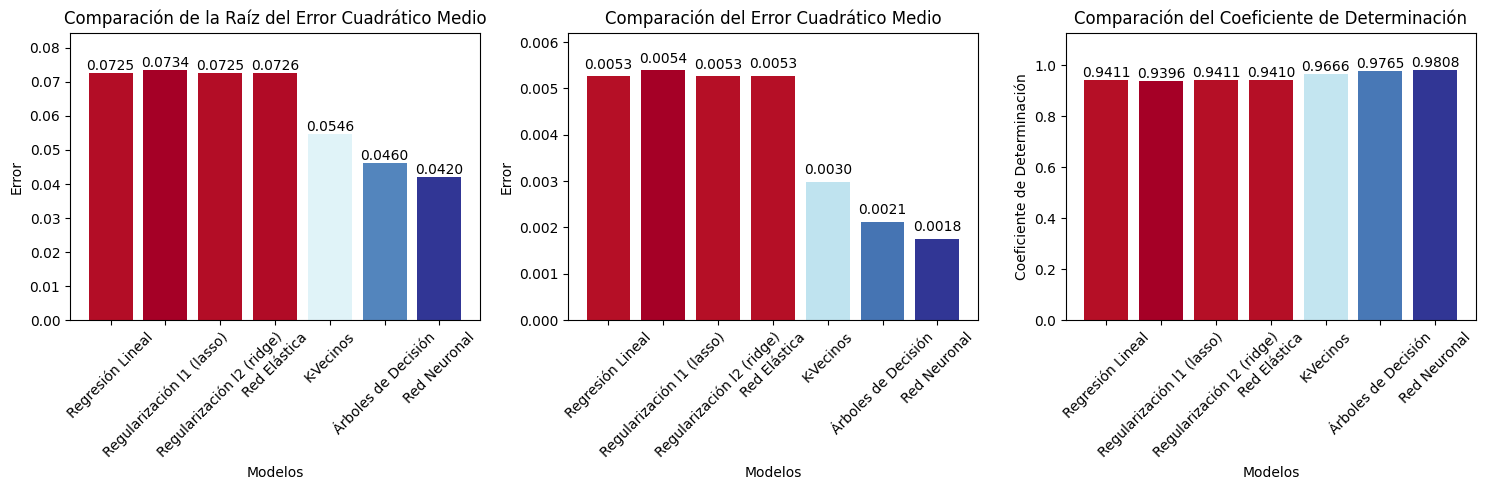

In [ ]:
# Definir los títulos y etiquetas para cada plot
titulos = ['Comparación de la Raíz del Error Cuadrático Medio',
           'Comparación del Error Cuadrático Medio',
           'Comparación del Coeficiente de Determinación']

etiqueta_x = 'Modelos'
etiquetas_y = ['Error', 'Error', 'Coeficiente de Determinación']

# Definir los colormaps y normalizaciones para cada plot
cmaps = [plt.get_cmap('RdYlBu_r'), plt.get_cmap('RdYlBu_r'), plt.get_cmap('RdYlBu')]
norms = [plt.Normalize(vmin=min(RMSEModels), vmax=max(RMSEModels)),
         plt.Normalize(vmin=min(MSEModels), vmax=max(MSEModels)),
         plt.Normalize(vmin=min(r2models), vmax=max(r2models))]

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Construir los plots de manera iterativa
for i, ax in enumerate(axs):
    for j, valor in enumerate([RMSEModels, MSEModels, r2models][i]):
        ax.bar(j, valor, color=cmaps[i](norms[i](valor)))
    ax.set_title(titulos[i])
    ax.set_xlabel(etiqueta_x)
    ax.set_ylabel(etiquetas_y[i])
    ax.set_xticks(range(len(modelos)))
    ax.set_xticklabels(modelos, rotation=45)

        # Agregar el valor específico de cada barra
    for j, valor in enumerate([RMSEModels, MSEModels, r2models][i]):
        ax.text(j, valor + 0.0001, f"{valor:.4f}", ha='center', va='bottom')


    ax.set_ylim(0, max([RMSEModels, MSEModels, r2models][i]) * 1.15)

# Ajustar el tamaño del gráfico
plt.tight_layout()

# Mostrar el plot
plt.show()

## Parte 5: Conclusiones

Basándonos en los resultados obtenidos, podemos notar que el valor del coeficiente de determinación ($R^2$) no varía significativamente entre los modelos, siendo Lasso el que presenta el valor más bajo. Sin embargo, la diferencia en la minimización del error ($MSE$ y $RMSE$) entre K-Vecinos, Árboles de Decisión y el modelo de redes neuronales es considerable. Teniendo esto en cuenta, nos decidimos a utilizar el modelo de redes neuronales, ya que, como se mencionó anteriormente, queremos ser exhaustivos al trabajar en el ámbito de la salud.

La siguiente sección de código se utiliza para almacenar el modelo en local, con la finalidad de poder realizar la configurarción de la aplicación en streamlit fuera de este notebook.

In [ ]:
torch.save(strokeModel.state_dict(), 'strokeModel.pth')

## Parte 6: Creacion de la API

Para facilitar el uso de nuestro modelo en aplicaciones web, también construimos una API que:

1. Carga en memoria la información del modelo preentrenado.

2. Carga el conjunto de datos de entrenamiento utilizado para entrenar dicho modelo (para su uso posterior).

3. Permanece en espera activa para recibir solicitudes HTTP de tipo POST, donde:
  
  1. Recibe los datos del usuario que desea conocer su probabilidad de sufrir un ACV.
  
  2. Envía dichos datos al modelo de aprendizaje automático cargado previamente.

  3. Identifica cuáles de los datos del usuario tienen mayor influencia en el cálculo de la probabilidad de sufrir un ACV.

  4. Crea y codifica un gráfico de Matplotlib que muestra dicha influencia visualmente.

  5. Responde a la solicitud recibida con un diccionario que contiene la predicción de probabilidad de ACV y el gráfico descrito anteriormente.

Las siguientes secciones de código se dejan como muestra de como se define y usa la API

In [ ]:
import os
import shap
import torch
import base64
import numpy as np
import pandas as pd

from io import BytesIO
from fastapi import FastAPI
from strokeModel import strokeModelNN

In [ ]:
model = strokeModelNN()
try:
    model.load_state_dict(torch.load('./strokeModelFinal.pth'))
    datos = pd.read_csv('./X_train_NN.csv')
except:
    current_dir = os.path.dirname(os.path.abspath(__file__))
    model.load_state_dict(torch.load(current_dir + '/strokeModelFinal.pth'))
    datos = pd.read_csv(current_dir+'/X_train_NN.csv')

X_train = datos.values

In [ ]:
explainer = shap.DeepExplainer(model,torch.tensor(X_train))

columnas = ['Femenino', 'Masculino', 'Edad', 'Dolor de pecho', 'Presión arterial elevada', 'Latidos Irregulares', 'Falta de Aire', 'Fatiga', 'Mareo', 'Hinchazón', 'Dolor en cuello o mandíbula', 'Sudoración excesiva', 'Tos persistente', 'Náuseas', 'Malestar en el pecho', 'Extremidades frías', 'Ronquidos o apnea', 'Ansiedad']

In [ ]:
app = FastAPI()

@app.post("/predict")

async def predict(data: dict):
    input_data = data['informacion_usuario']
    input_data = np.float32(list(input_data.values()))
    tensorInput = torch.tensor(np.array(input_data).reshape((1,18)))

    prediction = model.predict(torch.tensor(input_data))[0].item()
    shap_values = explainer.shap_values(tensorInput)[0]
    shap_values = [ shap_value[0] for shap_value in shap_values ]
    shap_values = np.array(shap_values)

    shap.initjs()

    p = shap.force_plot(base_value=explainer.expected_value,shap_values= shap_values,matplotlib=True, feature_names = columnas, show = False, out_names = f"Factores de riesgo de un Accidente Cerebro Vascular (ACV) en su caso, {'Sr. ' if input_data[1] != 0.0 else 'Sra. '}{''}", text_rotation=15)

    buf = BytesIO()
    p.savefig(buf, format='png')
    buf.seek(0)

    # Convierte la imagen a base64
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')

    # 4. Visualizar la explicación

    return {
        "prediction": prediction,
        "imagen": image_base64
    }